High-Performance Data Preprocessing Using Parallel Programming in Python

Data Preprocessing Using Pandas (Serial) vs Dask (Parallel)

~Compare serial data preprocessing using Pandas with parallel data preprocessing using Dask.

~Show how parallel programming reduces execution time for large-scale text data cleaning.

~Visualize performance differences as dataset size increases.

In [ ]:
import pandas as pd
import dask.dataframe as dd
import re, time
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [ ]:
STOPWORDS = {"a", "an", "the", "is", "are", "in", "on", "and", "or"}
STEMMER = PorterStemmer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in STOPWORDS]
    tokens = [STEMMER.stem(w) for w in tokens]
    return " ".join(tokens)



  Cleaning Function  with Convert to lowercase

Remove special characters ([^a-z\s])

Tokenize into words (using nltk.word_tokenize)

Remove stopwords (a, an, the, is, are, …)

Apply stemming (PorterStemmer)  RUNNNIGN TO RUN LIKE THAT

Return cleaned text

In [ ]:
def serial_processing(file, nrows=None):
    start = time.time()
    df = pd.read_csv(file, nrows=nrows)
    df["Summary"] = df["Summary"].astype(str).map(clean_text)
    df["Text"] = df["Text"].astype(str).map(clean_text)
    return time.time() - start

Reads CSV with Pandas

Cleans text row by row (single CPU)

Returns execution time

In [ ]:
def parallel_processing(file, nrows=None):
    start = time.time()
    ddf = dd.read_csv(file, blocksize="16MB", assume_missing=True)
    if nrows:
        ddf = ddf.head(nrows, compute=False)
    ddf["Summary"] = ddf["Summary"].astype(str).map(clean_text, meta=("Summary", "str"))
    ddf["Text"] = ddf["Text"].astype(str).map(clean_text, meta=("Text", "str"))
    ddf.compute()
    return time.time() - start

Reads CSV with Dask (parallel partitions)

Splits dataset into blocks for parallel processing

Cleans text in multiple workers simultaneously

Returns execution time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to file in your Drive
FILE = "/content/drive/MyDrive/Reviews.csv"  # data set used  reviews.csv from amazon fine food reviews
import nltk
nltk.download("punkt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Rows: 30000, Serial: 48.05 sec, Parallel: 52.45 sec


/usr/local/lib/python3.12/dist-packages/dask/dataframe/core.py:382: UserWarning: Insufficient elements for `head`. 100000 elements requested, only 31973 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


Rows: 100000, Serial: 171.30 sec, Parallel: 54.38 sec


/usr/local/lib/python3.12/dist-packages/dask/dataframe/core.py:382: UserWarning: Insufficient elements for `head`. 200000 elements requested, only 31973 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


Rows: 200000, Serial: 327.33 sec, Parallel: 51.93 sec


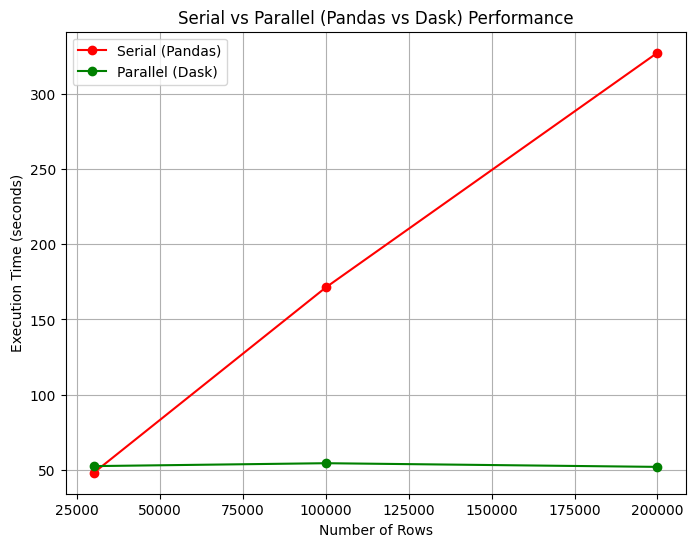

In [ ]:
rows_list = [30000, 100000, 200000]    #Tested on: 30k, 100k, 200k rows
serial_times, parallel_times = [], []

for n in rows_list:
    t1 = serial_processing(FILE, nrows=n)
    t2 = parallel_processing(FILE, nrows=n)
    serial_times.append(t1)
    parallel_times.append(t2)
    print(f"Rows: {n}, Serial: {t1:.2f} sec, Parallel: {t2:.2f} sec")

plt.figure(figsize=(8,6))
plt.plot(rows_list, serial_times, marker='o', color='red', label="Serial (Pandas)")
plt.plot(rows_list, parallel_times, marker='o', color='green', label="Parallel (Dask)")
plt.xlabel("Number of Rows")
plt.ylabel("Execution Time (seconds)")
plt.title("Serial vs Parallel (Pandas vs Dask) Performance")
plt.legend()
plt.grid(True)
plt.show()

insights---->

For small datasets (30k rows), Dask took slightly more time than Pandas because of task scheduling overhead.
However, as the dataset grew (100k and 200k rows), Dask became significantly faster.
This is because parallel processing distributes the work across multiple cores, while Pandas processes everything on a single core.
The experiment shows that parallel programming is more effective for large-scale data preprocessing


results

| Rows    | Serial (Pandas) | Parallel (Dask) |
| ------- | --------------- | --------------- |
| 30,000  | 48.05 sec       | 52.45 sec       |
| 100,000 | 171.30 sec      | 54.38 sec       |
| 200,000 | 327.33 sec      | 51.93 sec       |


